In [320]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from tqdm import tqdm
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support
from torch.utils.data import DataLoader, WeightedRandomSampler
import torch.nn as nn
from sklearn.metrics import mean_squared_error

In [321]:
import matplotlib.pyplot as plt

In [322]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [329]:
df = pd.read_csv('data_coordinate_2.csv')
df

,Label_x,Label_y,RSSI_1,proximity_1,accuracy_1,RSSI_2,proximity_2,accuracy_2,RSSI_3,proximity_3,...,accuracy_5,RSSI_6,proximity_6,accuracy_6,RSSI_7,proximity_7,accuracy_7,RSSI_8,proximity_8,accuracy_8
0,59.0,0.0,0.0,unknow,-1.000000,0.0,unknow,-1.000000,0.0,unknow,...,13.553179,-70.0,far,16.389896,-61.0,far,4.898700,-71.0,far,14.615079
1,59.0,0.0,0.0,unknow,-1.000000,0.0,unknow,-1.000000,0.0,unknow,...,13.674947,-73.0,far,16.955157,-56.0,far,4.330151,-73.0,far,15.479361
2,59.0,0.0,0.0,unknow,-1.000000,0.0,unknow,-1.000000,0.0,unknow,...,13.782553,-73.0,far,17.493302,-57.0,far,4.066401,-71.0,far,15.858452
3,59.0,0.0,0.0,unknow,-1.000000,0.0,unknow,-1.000000,0.0,unknow,...,13.877927,-69.0,far,17.166875,-61.0,far,4.240749,-66.0,far,14.785785
4,59.0,0.0,0.0,unknow,-1.000000,0.0,unknow,-1.000000,0.0,unknow,...,14.698104,-67.0,far,16.344412,-64.0,far,4.618459,-65.0,far,13.674329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8900,0.0,3.0,-57.0,far,3.650477,-71.0,far,19.420655,-78.0,far,...,-1.000000,0.0,unknow,-1.000000,0.0,unknow,-1.000000,0.0,unknow,-1.000000
8901,0.0,3.0,-57.0,far,3.650477,-71.0,far,19.420655,-78.0,far,...,-1.000000,0.0,unknow,-1.000000,0.0,unknow,-1.000000,0.0,unknow,-1.000000
8902,0.0,3.0,-58.0,far,3.639742,-72.0,far,19.616097,-77.0,far,...,54.113952,0.0,unknow,-1.000000,0.0,unknow,-1.000000,0.0,unknow,-1.000000
8903,0.0,3.0,-58.0,far,3.639742,-72.0,far,19.616097,-77.0,far,...,54.113952,0.0,unknow,-1.000000,0.0,unknow,-1.000000,0.0,unknow,-1.000000


In [177]:
'''df = pd.read_csv('test.csv')
df
test = df.drop(['proximity_1', 'proximity_2', 'proximity_3', 'proximity_4','proximity_5', 'proximity_6', 'proximity_7', 'proximity_8'], axis=1)
test
test = test.loc[:,test.columns[2:]]
test.shape
test = np.asarray(test)

x = []
for i in range(16):
    x.append(test[0][i])'''
'''x.append(1)
x.append(0)
x.append(1)
x.append(0)
x.append(1)
x.append(1)
x.append(0)
x.append(1)
x.append(0)
x.append(1)
x.append(0)
x.append(1)
x.append(0)
x.append(1)
x.append(0)'''

,Label_x,Label_y,RSSI_1,proximity_1,accuracy_1,RSSI_2,proximity_2,accuracy_2,RSSI_3,proximity_3,...,accuracy_5,RSSI_6,proximity_6,accuracy_6,RSSI_7,proximity_7,accuracy_7,RSSI_8,proximity_8,accuracy_8
0,0,NaN,0.0,unknow,-1.0,0.0,unknow,-1.0,0.0,unknow,...,22.146865,-70.0,far,13.634711,-67.0,far,7.797754,-41.0,near,0.393386


In [330]:
proximity_1_dummies = pd.get_dummies(df.proximity_1,prefix='proximity_1',dtype=int)
proximity_2_dummies = pd.get_dummies(df.proximity_2,prefix='proximity_2',dtype=int)
proximity_3_dummies = pd.get_dummies(df.proximity_3,prefix='proximity_3',dtype=int)
proximity_4_dummies = pd.get_dummies(df.proximity_4,prefix='proximity_4',dtype=int)
proximity_5_dummies = pd.get_dummies(df.proximity_5,prefix='proximity_5',dtype=int)
proximity_6_dummies = pd.get_dummies(df.proximity_6,prefix='proximity_6',dtype=int)
proximity_7_dummies = pd.get_dummies(df.proximity_7,prefix='proximity_7',dtype=int)
proximity_8_dummies = pd.get_dummies(df.proximity_8,prefix='proximity_8',dtype=int)
df = pd.concat([df, proximity_1_dummies, proximity_2_dummies, proximity_3_dummies, proximity_4_dummies, proximity_5_dummies, proximity_6_dummies, proximity_7_dummies, proximity_8_dummies], axis=1)
df

,Label_x,Label_y,RSSI_1,proximity_1,accuracy_1,RSSI_2,proximity_2,accuracy_2,RSSI_3,proximity_3,...,proximity_5_unknow,proximity_6_far,proximity_6_near,proximity_6_unknow,proximity_7_far,proximity_7_near,proximity_7_unknow,proximity_8_far,proximity_8_near,proximity_8_unknow
0,59.0,0.0,0.0,unknow,-1.000000,0.0,unknow,-1.000000,0.0,unknow,...,0,1,0,0,1,0,0,1,0,0
1,59.0,0.0,0.0,unknow,-1.000000,0.0,unknow,-1.000000,0.0,unknow,...,0,1,0,0,1,0,0,1,0,0
2,59.0,0.0,0.0,unknow,-1.000000,0.0,unknow,-1.000000,0.0,unknow,...,0,1,0,0,1,0,0,1,0,0
3,59.0,0.0,0.0,unknow,-1.000000,0.0,unknow,-1.000000,0.0,unknow,...,0,1,0,0,1,0,0,1,0,0
4,59.0,0.0,0.0,unknow,-1.000000,0.0,unknow,-1.000000,0.0,unknow,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8900,0.0,3.0,-57.0,far,3.650477,-71.0,far,19.420655,-78.0,far,...,1,0,0,1,0,0,1,0,0,1
8901,0.0,3.0,-57.0,far,3.650477,-71.0,far,19.420655,-78.0,far,...,1,0,0,1,0,0,1,0,0,1
8902,0.0,3.0,-58.0,far,3.639742,-72.0,far,19.616097,-77.0,far,...,0,0,0,1,0,0,1,0,0,1
8903,0.0,3.0,-58.0,far,3.639742,-72.0,far,19.616097,-77.0,far,...,0,0,0,1,0,0,1,0,0,1


In [331]:
df = df.drop(['proximity_1', 'proximity_2', 'proximity_3', 'proximity_4','proximity_5', 'proximity_6', 'proximity_7', 'proximity_8'], axis=1)
df

,Label_x,Label_y,RSSI_1,accuracy_1,RSSI_2,accuracy_2,RSSI_3,accuracy_3,RSSI_4,accuracy_4,...,proximity_5_unknow,proximity_6_far,proximity_6_near,proximity_6_unknow,proximity_7_far,proximity_7_near,proximity_7_unknow,proximity_8_far,proximity_8_near,proximity_8_unknow
0,59.0,0.0,0.0,-1.000000,0.0,-1.000000,0.0,-1.000000,0.0,-1.0,...,0,1,0,0,1,0,0,1,0,0
1,59.0,0.0,0.0,-1.000000,0.0,-1.000000,0.0,-1.000000,0.0,-1.0,...,0,1,0,0,1,0,0,1,0,0
2,59.0,0.0,0.0,-1.000000,0.0,-1.000000,0.0,-1.000000,0.0,-1.0,...,0,1,0,0,1,0,0,1,0,0
3,59.0,0.0,0.0,-1.000000,0.0,-1.000000,0.0,-1.000000,0.0,-1.0,...,0,1,0,0,1,0,0,1,0,0
4,59.0,0.0,0.0,-1.000000,0.0,-1.000000,0.0,-1.000000,0.0,-1.0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8900,0.0,3.0,-57.0,3.650477,-71.0,19.420655,-78.0,31.573019,0.0,-1.0,...,1,0,0,1,0,0,1,0,0,1
8901,0.0,3.0,-57.0,3.650477,-71.0,19.420655,-78.0,31.573019,0.0,-1.0,...,1,0,0,1,0,0,1,0,0,1
8902,0.0,3.0,-58.0,3.639742,-72.0,19.616097,-77.0,32.118272,0.0,-1.0,...,0,0,0,1,0,0,1,0,0,1
8903,0.0,3.0,-58.0,3.639742,-72.0,19.616097,-77.0,32.118272,0.0,-1.0,...,0,0,0,1,0,0,1,0,0,1


In [332]:
df = df.drop(['proximity_5_immediate','proximity_1_unknow', 'proximity_2_unknow', 'proximity_3_unknow', 'proximity_4_unknow','proximity_5_unknow', 'proximity_6_unknow', 'proximity_7_unknow', 'proximity_8_unknow'], axis=1)
df

,Label_x,Label_y,RSSI_1,accuracy_1,RSSI_2,accuracy_2,RSSI_3,accuracy_3,RSSI_4,accuracy_4,...,proximity_4_far,proximity_4_near,proximity_5_far,proximity_5_near,proximity_6_far,proximity_6_near,proximity_7_far,proximity_7_near,proximity_8_far,proximity_8_near
0,59.0,0.0,0.0,-1.000000,0.0,-1.000000,0.0,-1.000000,0.0,-1.0,...,0,0,1,0,1,0,1,0,1,0
1,59.0,0.0,0.0,-1.000000,0.0,-1.000000,0.0,-1.000000,0.0,-1.0,...,0,0,1,0,1,0,1,0,1,0
2,59.0,0.0,0.0,-1.000000,0.0,-1.000000,0.0,-1.000000,0.0,-1.0,...,0,0,1,0,1,0,1,0,1,0
3,59.0,0.0,0.0,-1.000000,0.0,-1.000000,0.0,-1.000000,0.0,-1.0,...,0,0,1,0,1,0,1,0,1,0
4,59.0,0.0,0.0,-1.000000,0.0,-1.000000,0.0,-1.000000,0.0,-1.0,...,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8900,0.0,3.0,-57.0,3.650477,-71.0,19.420655,-78.0,31.573019,0.0,-1.0,...,0,0,0,0,0,0,0,0,0,0
8901,0.0,3.0,-57.0,3.650477,-71.0,19.420655,-78.0,31.573019,0.0,-1.0,...,0,0,0,0,0,0,0,0,0,0
8902,0.0,3.0,-58.0,3.639742,-72.0,19.616097,-77.0,32.118272,0.0,-1.0,...,0,0,1,0,0,0,0,0,0,0
8903,0.0,3.0,-58.0,3.639742,-72.0,19.616097,-77.0,32.118272,0.0,-1.0,...,0,0,1,0,0,0,0,0,0,0


In [333]:
label_x = df.Label_x.values
label_y = df.Label_y.values

In [334]:
df.columns[2:]

Index(['RSSI_1', 'accuracy_1', 'RSSI_2', 'accuracy_2', 'RSSI_3', 'accuracy_3',
       'RSSI_4', 'accuracy_4', 'RSSI_5', 'accuracy_5', 'RSSI_6', 'accuracy_6',
       'RSSI_7', 'accuracy_7', 'RSSI_8', 'accuracy_8', 'proximity_1_far',
       'proximity_1_near', 'proximity_2_far', 'proximity_2_near',
       'proximity_3_far', 'proximity_3_near', 'proximity_4_far',
       'proximity_4_near', 'proximity_5_far', 'proximity_5_near',
       'proximity_6_far', 'proximity_6_near', 'proximity_7_far',
       'proximity_7_near', 'proximity_8_far', 'proximity_8_near'],
      dtype='object')

In [335]:
features = df.loc[:,df.columns[2:]]
#features = essentia_df.loc[:,top_features]
features = np.asarray(features)
features.shape

(8905, 32)

In [336]:
train_features, test_features, train_x, test_x, train_y, test_y = train_test_split(features, label_x, label_y, test_size=0.2, random_state=42)
train_features.shape, test_features.shape,  train_x.shape, test_x.shape,  train_y.shape, test_y.shape

((7124, 32), (1781, 32), (7124,), (1781,), (7124,), (1781,))

In [337]:
class TrainDataset(torch.utils.data.Dataset):
    def __init__(self, features, label):
      self.features = features
      self.labels = label
    def __getitem__(self, index):
      features = self.features[index]    
      label = self.labels[index]
      return features, label
    def __len__(self):
      return len(self.features)


In [338]:
class MLP(nn.Module):
    
    def __init__(self):
        super(MLP, self).__init__()

        self.linear1 = nn.Sequential(
            nn.Linear(32,16),
            nn.ReLU()
        )
        #self.dropout = nn.Dropout(0.5)

        self.linear2 = nn.Linear(16,1)
    def forward(self, features):     
        outputs = self.linear1(features)
        #outputs = self.dropout(outputs)
        outputs = self.linear2(outputs)
        return outputs


In [176]:
means = scaler.mean_
var = scaler.var_

In [174]:
#means

array([-3.85505828e+01,  1.31211805e+01, -4.09148626e+01,  1.29396488e+01,
       -4.21421732e+01,  1.12036386e+01, -4.79941715e+01,  1.73547497e+01,
       -6.80670275e+01,  1.85836758e+01, -6.73390924e+01,  1.93872257e+01,
       -5.38898834e+01,  2.26445093e+01, -5.25884679e+01,  1.92296542e+01,
        5.28517902e-01,  1.85262281e-02,  5.90757702e-01,  1.10324729e-02,
        6.14487927e-01,  6.50915903e-01,  2.85179017e-02,  9.35054122e-01,
        5.80766028e-02,  9.34221482e-01,  4.89175687e-02,  7.31057452e-01,
        2.56036636e-02,  7.33555371e-01,  1.51956703e-02])

In [168]:
#var

array([1.26488150e+03, 3.65368520e+02, 1.16004125e+03, 4.79787972e+02,
       1.14235843e+03, 2.87668953e+02, 1.13422062e+03, 3.90093381e+02,
       9.20188212e+01, 1.58781252e+02, 1.39771153e+02, 2.16489625e+02,
       9.90263270e+02, 5.97226095e+02, 9.72687636e+02, 4.66556336e+02,
       2.49186729e-01, 1.81830070e-02, 2.41763040e-01, 1.09107575e-02,
       2.36892515e-01, 2.27224390e-01, 2.77046310e-02, 6.07279113e-02,
       5.47037110e-02, 6.14517045e-02, 4.65246402e-02, 1.96612454e-01,
       2.49481160e-02, 1.95451889e-01, 1.49647619e-02])

In [260]:
'''for i in range(len(means)):
    x[i] = (x[i] - means[i]) / np.sqrt(var[i])'''

In [188]:
'''model = MLP().to(device)
model.load_state_dict(torch.load('coordinate_x' + "/model_best_loss"+ '.pt'))'''

<All keys matched successfully>

In [264]:
# k = 905

# x = np.array(test_features[k])

# for i in range(len(means)):
#     x[i] = (x[i] - means[i]) / np.sqrt(var[i])
    
'''output = model(torch.tensor(x).to(device).to(torch.float32))
print(output[0] * 59, test_x[k])'''


tensor(33.7847, device='cuda:0', grad_fn=<MulBackward0>) 50.0


In [193]:
#model(torch.tensor(x).to(device).to(torch.float32))

tensor([0.0104], device='cuda:0', grad_fn=<AddBackward0>)

In [339]:
def train(train_dataloader, val_dataloader, num_epochs = 10, validation = True, save_file = 'coordinate_x', train_batch_size = 32, learning_rate = 5e-5):
    history = dict()
    train_history_loss = []
    val_history_loss = []
    model = MLP()
    model = model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    loss_function = torch.nn.MSELoss()
    best_val_loss = np.inf
    for epoch in range(num_epochs):
        total_loss = 0
        train_loss = 0
        batch_id = 0
        print(f"Epoch: {epoch + 1}",'training')
        for batch in train_dataloader:
            model.train()
            features = batch[0].to(device)
            features = features.to(torch.float32)
            labels = batch[1].type(torch.float32).to(device)
            outputs = model(
                features = features
            )
            #print(outputs, labels)
            loss = loss_function(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            train_loss += loss.item()
            print('batch:', batch_id, '/',str(len(train_dataloader)), 'loss:', loss.item(), end='\r')
            batch_id += 1
        average_loss = total_loss / len(train_dataloader)
        train_history_loss.append(average_loss)
        print(f"Loss: {average_loss:.4f}")
        if validation:
            print('validation')
            model.eval()
            prediction = []
            ans = []
            val_loss = 0.0
            batch_id = 0
            with torch.no_grad(): 
                for batch in val_dataloader:
                    features = batch[0].to(device)
                    features = features.to(torch.float32)
                    #labels = batch['labels'].clone().detach().to(device)
                    labels = batch[1].type(torch.float32).to(device)
                    output = model( 
                        features = features
                    )
                    loss = loss_function(output, labels.to(device))
                    val_loss += loss.item()
                    print('batch:', batch_id, '/',str(len(val_dataloader)), 'loss:', loss.item(), end='\r')
                    batch_id += 1
            val_loss /= len(val_dataloader)
            val_history_loss.append(val_loss)
            print('loss:', val_loss)
            #if val_monitor == 'loss':
            if val_loss <= best_val_loss:
                best_val_loss = val_loss
                if not os.path.isdir(save_file):
                    os.mkdir(save_file)
                if not os.path.isdir(save_file):
                    os.mkdir(save_file)
                torch.save(model.state_dict(), save_file + '/model_best_loss' + '.pt')
        else:
            if not os.path.isdir(save_file):
                    os.mkdir(save_file)
            if not os.path.isdir(save_file):
                os.mkdir(save_file)
                          
    if not os.path.isdir(save_file):
        os.mkdir(save_file)
    if not os.path.isdir(save_file):
        os.mkdir(save_file)
    torch.save(model.state_dict(), save_file + '/model_final.pt')
    history['train_loss'] = train_history_loss
    history['val_loss'] = val_history_loss
    return history
def test(test_dataloader, load_best = 'loss', load_file = 'coordinate_x'):
    print('testing')
    if load_best == 'loss':
        model = MLP().to(device)
        model.load_state_dict(torch.load(load_file + "/model_best_loss"+ '.pt'))
    elif load_best == 'accuracy':
        model = MLP().to(device)
        model.load_state_dict(torch.load(load_file + "/model_best_acc"+ '.pt'))
    else:
        #model = BertForSequenceClassification.from_pretrained(load_file + "/model5").to(device)
        model = MLP().to(device)
        model.load_state_dict(torch.load(load_file + "/model_final"+ '.pt'))
    model.eval()
    #loss_function = torch.nn.MSELoss()
    prediction = []
    ans = []
    test_loss = 0.0
    batch_id = 0
    with torch.no_grad(): 
        for batch in test_dataloader:
            features = batch[0].to(device)
            features = features.to(torch.float32)
            #labels = torch.tensor(batch['labels'])
            labels = batch[1].type(torch.LongTensor).to(device)
            output = model(
                features = features
            )
            
            #loss = loss_function(output, labels.to(device))
            prediction.append(output.cpu().item())
            ans.append(labels.cpu().item())
            #test_loss += loss.item()
            batch_id += 1
            print('batch:', batch_id, end='\r')
    return prediction, ans

In [340]:
batch_size = 16
epochs = 200
learning_rate = 1e-4

x-coordinate

In [341]:
scaler = StandardScaler().fit(train_features)
train_feature = scaler.transform(train_features)
m_scaler = MinMaxScaler().fit(train_x.reshape(-1, 1))
x = m_scaler.transform(train_x.reshape(-1, 1))
train_feature, val_feature, train_x1, val_x = train_test_split(train_feature, x, test_size=0.1, random_state=42)
train_dataset = TrainDataset(features=train_feature, label = train_x1)
train_dataloader =  DataLoader(train_dataset,batch_size=batch_size,shuffle=True)

val_dataset = TrainDataset(features=val_feature, label = val_x)
val_dataloader =  DataLoader(val_dataset,batch_size=1,shuffle=False)
#test_choi = StandardScaler().fit_transform(features[test])
test_feature = scaler.transform(test_features)
test_dataset = TrainDataset(features=test_feature, label = test_x)
test_dataloader =  DataLoader(test_dataset,batch_size=1,shuffle=False)

history = train(train_dataloader, val_dataloader,num_epochs=epochs, train_batch_size = batch_size, learning_rate=learning_rate)
prediction,  ans = test(test_dataloader, load_best='loss')


Epoch: 1 training
Loss: 0.3956 401 loss: 0.16054782271385193
validation
loss: 0.2085469396944136.12986111640930176325
Epoch: 2 training
Loss: 0.1182 401 loss: 0.054514966905117035
validation
loss: 0.0615305160211762143405325487256058648
Epoch: 3 training
Loss: 0.0390 401 loss: 0.016205368563532836
validation
loss: 0.0278306554971699200452002324163913757
Epoch: 4 training
Loss: 0.0205 401 loss: 0.0261163171380758337
validation
loss: 0.0184987590233448470101816840469837198
Epoch: 5 training
Loss: 0.0137 401 loss: 0.0099554620683193255
validation
loss: 0.0138069382881721960263838656246662146
Epoch: 6 training
Loss: 0.0102 401 loss: 0.0102395536378026853
validation
loss: 0.0112832061266179650588225945830345153
Epoch: 7 training
Loss: 0.0082 401 loss: 0.0139410728588700385
validation
loss: 0.0098915709451659441026423834264278465
Epoch: 8 training
Loss: 0.0069 401 loss: 0.0102659314870834355
validation
loss: 0.0089104516488608601302764751017093785
Epoch: 9 training
Loss: 0.0060 401 loss: 0.0

In [370]:
scaler = StandardScaler().fit(train_features)
train_feature = scaler.transform(train_features)
m_scaler = MinMaxScaler().fit(train_x.reshape(-1, 1))
x = m_scaler.transform(train_x.reshape(-1, 1))
train_feature, val_feature, train_x1, val_x = train_test_split(train_feature, x, test_size=0.1, random_state=42)
train_dataset = TrainDataset(features=train_feature, label = train_x1)
train_dataloader =  DataLoader(train_dataset,batch_size=batch_size,shuffle=True)

val_dataset = TrainDataset(features=val_feature, label = val_x)
val_dataloader =  DataLoader(val_dataset,batch_size=1,shuffle=False)
#test_choi = StandardScaler().fit_transform(features[test])
test_feature = scaler.transform(test_features)
test_dataset = TrainDataset(features=test_feature, label = test_x)
test_dataloader =  DataLoader(test_dataset,batch_size=1,shuffle=False)

#history = train(train_dataloader, val_dataloader,num_epochs=epochs, train_batch_size = batch_size, learning_rate=learning_rate)
prediction,  ans = test(test_dataloader, load_best='loss')


testing


In [343]:
means = scaler.mean_
var = scaler.var_
means, var

(array([-5.49813307e+01,  2.02836900e+01, -5.12295059e+01,  1.89525708e+01,
        -5.28121842e+01,  1.79461414e+01, -5.93107805e+01,  2.23033288e+01,
        -6.80050533e+01,  1.97052242e+01, -4.37827063e+01,  1.82833086e+01,
        -5.05384615e+01,  2.40715745e+01, -4.45701853e+01,  2.02052263e+01,
         7.56316676e-01,  9.54519933e-03,  7.09432903e-01,  2.52667041e-03,
         7.30769231e-01,  3.50926446e-03,  8.06569343e-01,  2.40033689e-02,
         9.43430657e-01,  2.52667041e-02,  5.88994947e-01,  1.41774284e-02,
         6.73357664e-01,  5.61482313e-03,  6.05558675e-01,  1.96518810e-03]),
 array([9.58050606e+02, 3.94714284e+02, 1.09360159e+03, 4.68397784e+02,
        1.03932604e+03, 3.33007164e+02, 7.70091512e+02, 4.37575729e+02,
        1.97865499e+02, 1.65795434e+02, 1.29568608e+03, 5.50567792e+02,
        1.23567525e+03, 6.00874879e+02, 1.31166338e+03, 6.30092940e+02,
        1.84301762e-01, 9.45408850e-03, 2.06137859e-01, 2.52028635e-03,
        1.96745562e-01, 3.4969

In [342]:
prediction,  ans = test(test_dataloader, load_best='loss')

testing


In [371]:
p_x = m_scaler.inverse_transform(np.array(prediction).reshape(-1, 1))
p_x = p_x.reshape(-1)
p_x.shape

(1781,)

In [372]:
mean_squared_error(np.maximum(p_x,0), ans)

3.1664866283657656

In [373]:
errors = 0
for i in range(len(p_x)):
    error = np.square(p_x[i] - ans[i])
    errors += error
print(errors / len(ans))

6.43092341481034


In [347]:
for i in range(len(p_x)):
    print(p_x[i], ans[i])

29.76630014181137 29
35.84285616874695 36
19.059328854084015 20
6.95385454595089 8
5.2848551124334335 5
12.691338136792183 14
32.566494047641754 34
42.204783260822296 40
22.559147477149963 22
36.448515355587006 37
13.155231401324272 10
45.08013552427292 43
28.273691803216934 27
42.158890664577484 38
45.12453353404999 45
42.60681998729706 46
29.023963660001755 29
17.71444895863533 17
2.211760487407446 2
12.741638883948326 12
12.691338136792183 14
32.169032514095306 30
24.55352893471718 25
10.232530638575554 8
5.413328006863594 6
12.793996885418892 11
52.232382357120514 52
2.245520558208227 3
38.38462024927139 36
12.75462420284748 10
8.17286828160286 7
33.50813978910446 35
55.31925904750824 56
19.518982768058777 20
2.7979179583489895 3
35.43080747127533 39
18.148436427116394 20
14.421909257769585 12
24.906282991170883 25
30.42376697063446 30
54.818839848041534 54
47.41031891107559 44
33.85917067527771 29
23.35713005065918 22
22.544082045555115 21
32.22635078430176 32
13.930292293429375 1

In [94]:
print("mean:",scaler.mean_)
print("var:",scaler.var_)

mean: [-3.85505828e+01  1.31211805e+01 -4.09148626e+01  1.29396488e+01
 -4.21421732e+01  1.12036386e+01 -4.79941715e+01  1.73547497e+01
 -6.80670275e+01  1.85836758e+01 -6.73390924e+01  1.93872257e+01
 -5.38898834e+01  2.26445093e+01 -5.25884679e+01  1.92296542e+01
  5.28517902e-01  1.85262281e-02  5.90757702e-01  1.10324729e-02
  6.14487927e-01  6.50915903e-01  2.85179017e-02  9.35054122e-01
  5.80766028e-02  9.34221482e-01  4.89175687e-02  7.31057452e-01
  2.56036636e-02  7.33555371e-01  1.51956703e-02]
var: [1.26488150e+03 3.65368520e+02 1.16004125e+03 4.79787972e+02
 1.14235843e+03 2.87668953e+02 1.13422062e+03 3.90093381e+02
 9.20188212e+01 1.58781252e+02 1.39771153e+02 2.16489625e+02
 9.90263270e+02 5.97226095e+02 9.72687636e+02 4.66556336e+02
 2.49186729e-01 1.81830070e-02 2.41763040e-01 1.09107575e-02
 2.36892515e-01 2.27224390e-01 2.77046310e-02 6.07279113e-02
 5.47037110e-02 6.14517045e-02 4.65246402e-02 1.96612454e-01
 2.49481160e-02 1.95451889e-01 1.49647619e-02]


In [95]:
'''X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min'''
print(m_scaler.data_max_[0])
print(m_scaler.data_min_[0])

59.0
0.0


Text(0.5, 1.0, 'loss history')

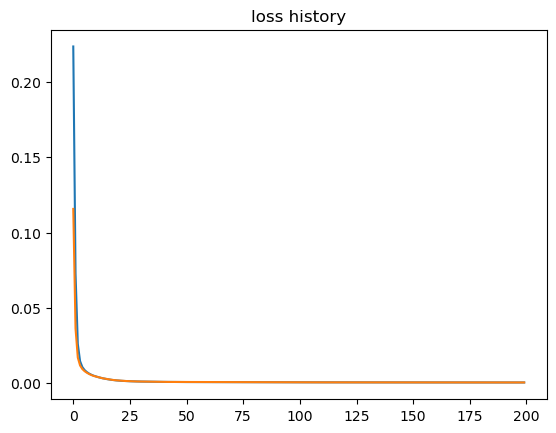

In [96]:
plt.plot(history['train_loss'])
plt.plot(history['val_loss'])
plt.title('loss history')

In [97]:
plt.plot(history['train_accuracy'])
plt.plot(history['val_accuracy'])
plt.title('accuracy history')

KeyError: 'train_accuracy'

y-coordinate

In [355]:
scaler = StandardScaler().fit(train_features)
train_feature = scaler.transform(train_features)
m_scaler = MinMaxScaler().fit(train_y.reshape(-1, 1))
y = m_scaler.transform(train_y.reshape(-1, 1))
train_feature, val_feature, train_y1, val_y = train_test_split(train_feature, y, test_size=0.1, random_state=42)
train_dataset = TrainDataset(features=train_feature, label = train_y1)
train_dataloader =  DataLoader(train_dataset,batch_size=batch_size,shuffle=True)

val_dataset = TrainDataset(features=val_feature, label = val_y)
val_dataloader =  DataLoader(val_dataset,batch_size=1,shuffle=False)
#test_choi = StandardScaler().fit_transform(features[test])
test_feature = scaler.transform(test_features)
test_dataset = TrainDataset(features=test_feature, label = test_y)
test_dataloader =  DataLoader(test_dataset,batch_size=1,shuffle=False)

history = train(train_dataloader, val_dataloader,num_epochs=epochs, train_batch_size = batch_size, learning_rate=learning_rate, save_file='coordinate_y')
prediction, ans = test(test_dataloader, load_best='loss',load_file='coordinate_y')

Epoch: 1 training
Loss: 0.1264 401 loss: 0.057281486690044486
validation
loss: 0.0885946066363485805430446192622185657
Epoch: 2 training
Loss: 0.0762 401 loss: 0.039016909897327426
validation
loss: 0.0703118909931139401351192314177751578
Epoch: 3 training
Loss: 0.0640 401 loss: 0.076995968818664554
validation
loss: 0.0627811543327153700535272480919957285
Epoch: 4 training
Loss: 0.0582 401 loss: 0.040664911270141666
validation
loss: 0.0587155476156506100595758482813835146
Epoch: 5 training
Loss: 0.0549 401 loss: 0.039968457072973255
validation
loss: 0.0560899612938003600681745307520031954
Epoch: 6 training
Loss: 0.0527 401 loss: 0.071539901196956635
validation
loss: 0.0541914060499863800452228356152772975
Epoch: 7 training
Loss: 0.0511 401 loss: 0.057194363325834274
validation
loss: 0.0529011976934174.00743764499202370644
Epoch: 8 training
Loss: 0.0499 401 loss: 0.037935171276330955
validation
loss: 0.0512608994572576400756350625306367926
Epoch: 9 training
Loss: 0.0489 401 loss: 0.04413

In [374]:
scaler = StandardScaler().fit(train_features)
train_feature = scaler.transform(train_features)
m_scaler = MinMaxScaler().fit(train_y.reshape(-1, 1))
y = m_scaler.transform(train_y.reshape(-1, 1))
train_feature, val_feature, train_y1, val_y = train_test_split(train_feature, y, test_size=0.1, random_state=42)
train_dataset = TrainDataset(features=train_feature, label = train_y1)
train_dataloader =  DataLoader(train_dataset,batch_size=batch_size,shuffle=True)

val_dataset = TrainDataset(features=val_feature, label = val_y)
val_dataloader =  DataLoader(val_dataset,batch_size=1,shuffle=False)
#test_choi = StandardScaler().fit_transform(features[test])
test_feature = scaler.transform(test_features)
test_dataset = TrainDataset(features=test_feature, label = test_y)
test_dataloader =  DataLoader(test_dataset,batch_size=1,shuffle=False)

#history = train(train_dataloader, val_dataloader,num_epochs=epochs, train_batch_size = batch_size, learning_rate=learning_rate, save_file='coordinate_y')
prediction, ans = test(test_dataloader, load_best='loss',load_file='coordinate_y')

testing


In [356]:
prediction, ans = test(test_dataloader, load_best='loss',load_file='coordinate_y')

testing


In [375]:
p_y = m_scaler.inverse_transform(np.array(prediction).reshape(-1, 1))
p_y = p_y.reshape(-1)
p_y.shape

(1781,)

In [378]:
0.67*ans

TypeError: can't multiply sequence by non-int of type 'float'

In [381]:
mean_squared_error(ans, np.maximum(p_y,0))

0.9096502302754661

In [359]:
for i in range(len(p_y)):
    print(p_y[i], ans[i])

1.2144911289215088 0
2.4721449613571167 3
1.105484664440155 3
1.921757161617279 1
1.4322012662887573 3
2.0194387435913086 3
0.4005564749240875 1
1.7355215549468994 3
0.20540118217468262 0
1.3128843903541565 1
1.3381937146186829 0
1.9961744546890259 3
1.6124525666236877 1
1.321045458316803 0
1.3751983642578125 1
1.2906795740127563 3
1.1400003731250763 1
1.1340904235839844 0
1.0822485387325287 1
1.5014728903770447 2
2.0194387435913086 3
2.1802115440368652 2
1.9244372844696045 3
1.1568072438240051 0
1.232181042432785 3
1.1516661942005157 0
3.4418562054634094 5
2.049892544746399 2
0.6770320236682892 1
1.6087839007377625 1
1.8682318925857544 3
0.15372395515441895 0
3.3529388904571533 2
1.6479209065437317 2
1.1860057711601257 0
0.16326144337654114 1
1.0767918825149536 3
1.433083415031433 0
1.0014034807682037 2
1.6661936044692993 2
3.480120599269867 5
1.7246472835540771 2
1.6481995582580566 0
1.5406045317649841 3
1.6702738404273987 2
1.3620728254318237 1
1.1850258708000183 2
1.498322784900665

In [360]:
print("mean:",scaler.mean_)
print("var:",scaler.var_)

mean: [-5.49813307e+01  2.02836900e+01 -5.12295059e+01  1.89525708e+01
 -5.28121842e+01  1.79461414e+01 -5.93107805e+01  2.23033288e+01
 -6.80050533e+01  1.97052242e+01 -4.37827063e+01  1.82833086e+01
 -5.05384615e+01  2.40715745e+01 -4.45701853e+01  2.02052263e+01
  7.56316676e-01  9.54519933e-03  7.09432903e-01  2.52667041e-03
  7.30769231e-01  3.50926446e-03  8.06569343e-01  2.40033689e-02
  9.43430657e-01  2.52667041e-02  5.88994947e-01  1.41774284e-02
  6.73357664e-01  5.61482313e-03  6.05558675e-01  1.96518810e-03]
var: [9.58050606e+02 3.94714284e+02 1.09360159e+03 4.68397784e+02
 1.03932604e+03 3.33007164e+02 7.70091512e+02 4.37575729e+02
 1.97865499e+02 1.65795434e+02 1.29568608e+03 5.50567792e+02
 1.23567525e+03 6.00874879e+02 1.31166338e+03 6.30092940e+02
 1.84301762e-01 9.45408850e-03 2.06137859e-01 2.52028635e-03
 1.96745562e-01 3.49694952e-03 1.56015238e-01 2.34272072e-02
 5.33692525e-02 2.46282978e-02 2.42079899e-01 1.39764289e-02
 2.19947120e-01 5.58329689e-03 2.38857366

In [382]:
test_x, test_y

(array([29., 36., 20., ..., 35., 38., 22.]),
 array([0., 3., 3., ..., 1., 0., 0.]))

In [383]:
test_coor = np.hstack((test_x.reshape(-1,1), test_y.reshape(-1,1)))
test_coor.shape

(1781, 2)

In [384]:
p_x, p_y

(array([29.76630014, 35.84285617, 19.05932885, ..., 35.52497345,
        38.59972817, 23.37900904]),
 array([1.21449113, 2.47214496, 1.10548466, ..., 0.72794616, 0.59327513,
        1.27476662]))

In [385]:
pred_coor = np.hstack((p_x.reshape(-1,1), p_y.reshape(-1,1)))
pred_coor.shape

(1781, 2)

In [386]:
test_coor,pred_coor

(array([[29.,  0.],
        [36.,  3.],
        [20.,  3.],
        ...,
        [35.,  1.],
        [38.,  0.],
        [22.,  0.]]),
 array([[29.76630014,  1.21449113],
        [35.84285617,  2.47214496],
        [19.05932885,  1.10548466],
        ...,
        [35.52497345,  0.72794616],
        [38.59972817,  0.59327513],
        [23.37900904,  1.27476662]]))

In [387]:
avg_dist = np.linalg.norm(test_coor - pred_coor) / len(test_coor)
avg_dist

0.06420581664852577

In [407]:
real_x, real_p_x

(array([ 8.85, 10.95,  6.15, ..., 10.65, 11.55,  6.75]),
 array([ 9.07989004, 10.90285685,  5.86779866, ..., 10.80749204,
        11.72991845,  7.16370271]))

In [398]:
real_x = 0.15 + 0.3 * test_x
real_y = 0.33+ 0.67 * test_y
#real_p_x = 0.15 + 0.3 * np.maximum(p_x,0)
real_p_x = 0.15 + 0.3 * p_x
#real_p_y = 0.33+ 0.67 * np.maximum(p_y,0)
real_p_y = 0.33+ 0.67 * p_y
real_coor = np.hstack((real_x.reshape(-1,1), real_y.reshape(-1,1)))
real_p_coor = np.hstack((real_p_x.reshape(-1,1), real_p_y.reshape(-1,1)))

In [408]:
mean_squared_error(real_x, real_p_x)

0.5787831073329294

In [399]:
mean_squared_error(real_y, real_p_y)

0.40896928512846714

In [402]:
real_coor,real_p_coor

(array([[ 8.85,  0.33],
        [10.95,  2.34],
        [ 6.15,  2.34],
        ...,
        [10.65,  1.  ],
        [11.55,  0.33],
        [ 6.75,  0.33]]),
 array([[ 9.07989004,  1.14370906],
        [10.90285685,  1.98633712],
        [ 5.86779866,  1.07067473],
        ...,
        [10.80749204,  0.81772393],
        [11.72991845,  0.72749434],
        [ 7.16370271,  1.18409364]]))

In [403]:
import math

In [405]:
dis = 0.0
for i in range(len(real_coor)):
    error = math.dist(real_coor[i], real_p_coor[i])
    dis += error
dis / len(real_p_coor)

0.742685994540704

In [401]:
avg_dist = np.linalg.norm(real_coor - real_p_coor) / len(real_coor)
avg_dist

0.02355006365795808

In [112]:
import coremltools as ct
import onnx

In [113]:
model = torch.load('coordinate_x/model_best_loss.pt')
dummy_input = torch.randn(1,39)
torch.onnx.export(model.cpu(), dummy_input, "model.onnx", input_names=["input"], output_names=["output"])
onnx_path = 'model.onnx'
ml_model = ct.converters.onnx.convert(model=onnx_path)
ml_model.save("model_x.mlmodel")

AttributeError: 'collections.OrderedDict' object has no attribute 'cpu'

In [ ]:
model = torch.load('coordinate_y/model_best_loss.pt')
dummy_input = torch.randn(1,39)
torch.onnx.export(model.cpu(), dummy_input, "model.onnx", input_names=["input"], output_names=["output"])
onnx_path = 'model.onnx'
ml_model = ct.converters.onnx.convert(model=onnx_path)
ml_model.save("model_y.mlmodel")

============= Diagnostic Run torch.onnx.export version 2.0.0+cu117 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

1/3: Converting Node Type Gemm
2/3: Converting Node Type Relu
3/3: Converting Node Type Gemm
Translation to CoreML spec completed. Now compiling the CoreML model.
Model Compilation done.
